# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

CONTRIBUTING.md         ames_train.csv*         test.csv
LICENSE.md              data_description.txt*   train.csv
README.md               index.ipynb
ames_test.csv*          submission_example.csv


In [3]:
# Loading the data
df = pd.read_csv('train.csv')

In [4]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  b        333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
print(df.shape)

(333, 15)


In [6]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
df.isnull().sum() #first thing is to check if there's any null value. No null value.

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [9]:
df.describe() # look for if there's any outliers (check max, 75%, std); so look at crim and zn columns

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [10]:
import seaborn as sns

# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics. 

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='crim'>

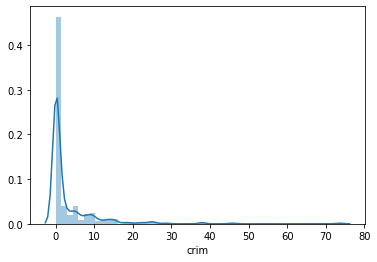

In [11]:
sns.distplot(df['crim'])

<AxesSubplot:xlabel='zn'>

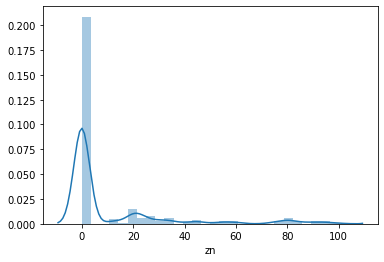

In [12]:
sns.distplot(df['zn'])

In [13]:
df.loc[df['crim'] > 30, :] #look for crim > 30, all columns

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
261,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
268,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
271,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
275,428,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


<AxesSubplot:xlabel='zn', ylabel='medv'>

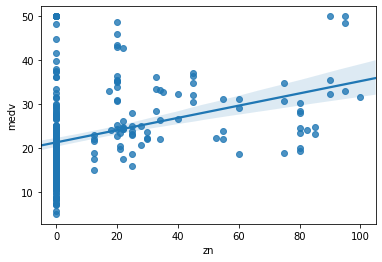

In [14]:
sns.regplot(x = 'zn', y = 'medv', data = df)

In [15]:
zn_0 = df.loc[df['zn'] == 0, :]
zn_no_0 = df.loc[df['zn'] != 0, :]

<AxesSubplot:xlabel='zn', ylabel='medv'>

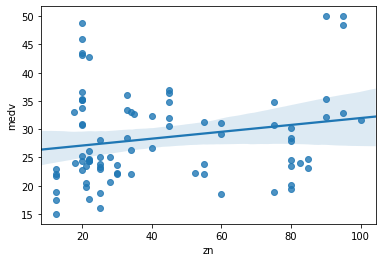

In [16]:
sns.regplot(x = 'zn', y = 'medv', data = zn_no_0)

In [17]:
zn_no_0[['zn', 'medv']].corr()

,zn,medv
zn,1.000000,0.200364
medv,0.200364,1.000000


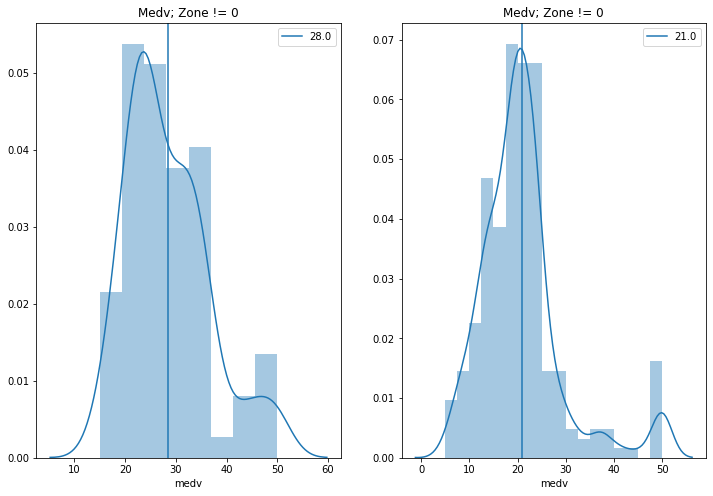

In [30]:
fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(121)
sns.distplot(zn_no_0['medv'], ax=ax1)
ax1.set_title('Medv; Zone != 0')
ax1.axvline(zn_no_0['medv'].mean(), label = np.round(zn_no_0['medv'].mean()))
ax1.legend()

ax2 = plt.subplot(122)
sns.distplot(zn_0['medv'], ax=ax2)
ax2.set_title('Medv; Zone != 0')
ax2.axvline(zn_0['medv'].mean(), label = np.round(zn_0['medv'].mean()))
ax2.legend()

Text(0, 0.5, 'Medv')

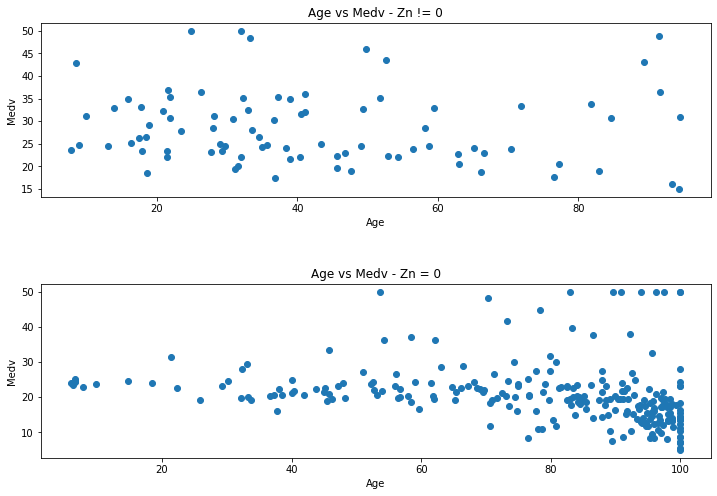

In [19]:
fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(hspace = .5) # add more space between the subplot

ax1 = plt.subplot(211)
ax1.scatter(zn_no_0['age'], zn_no_0['medv'])
ax1.set_title('Age vs Medv - Zn != 0')
ax1.set_xlabel('Age')
ax1.set_ylabel('Medv')

ax2 = plt.subplot(212)
ax2.scatter(zn_0['age'], zn_0['medv'])
ax2.set_title('Age vs Medv - Zn = 0')
ax2.set_xlabel('Age')
ax2.set_ylabel('Medv')

In [20]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [21]:
df['chas'].value_counts(normalize = True)

0    0.93994
1    0.06006
Name: chas, dtype: float64

In [22]:
df_chas = df.loc[df['chas'] == 1, :]
df_nc = df.loc[df['chas'] == 0, :]

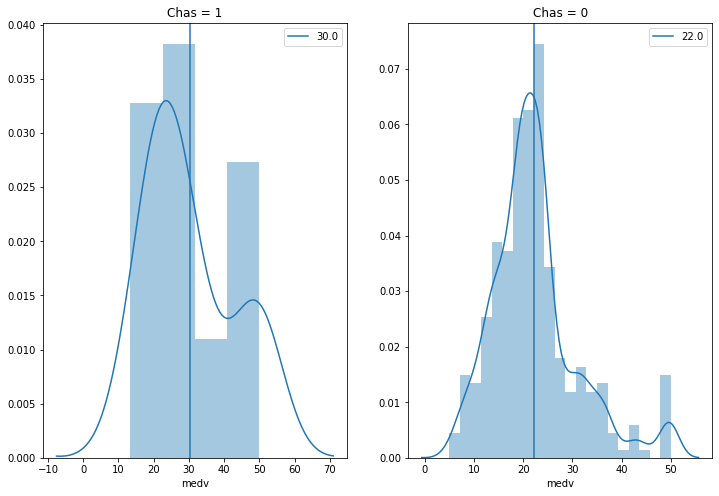

In [31]:
fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(121)
sns.distplot(df_chas['medv'], ax=ax1)
ax1.set_title('Chas = 1')
ax1.axvline(df_chas['medv'].mean(), label = np.round(df_chas['medv'].mean()))
ax1.legend()

ax2 = plt.subplot(122)
sns.distplot(df_nc['medv'], ax=ax2)
ax2.set_title('Chas = 0')
ax2.axvline(df_nc['medv'].mean(), label = np.round(df_nc['medv'].mean()))
ax2.legend()

#The label keyword is displayed in the legend. You need create the legend explicitly to see the label in the plot

In [24]:
df_chas.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


In [25]:
df_nc.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [26]:
# plt.style.available

In [27]:
# plt.style.use('dark_background')

Text(0, 0.5, 'Medv')

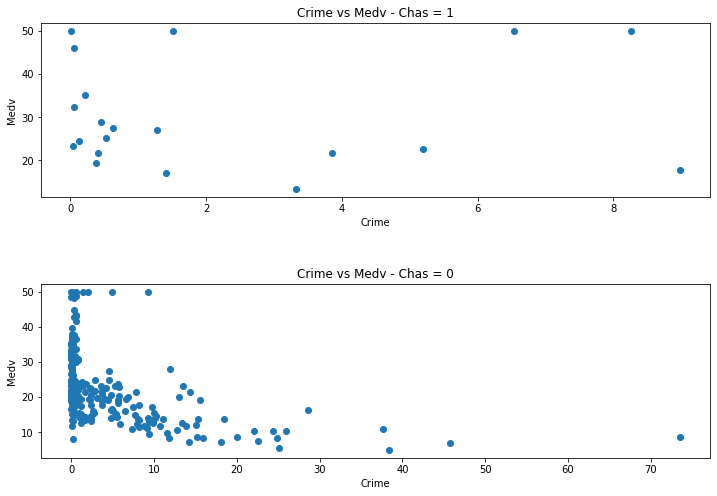

In [28]:
fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(hspace = .5) # add more space between the subplot

ax1 = plt.subplot(211)
ax1.scatter(df_chas['crim'], df_chas['medv'])
ax1.set_title('Crime vs Medv - Chas = 1')
ax1.set_xlabel('Crime')
ax1.set_ylabel('Medv')

ax2 = plt.subplot(212)
ax2.scatter(df_nc['crim'], df_nc['medv'])
ax2.set_title('Crime vs Medv - Chas = 0')
ax2.set_xlabel('Crime')
ax2.set_ylabel('Medv')

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!